In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns

### Function to Read and Load .cfile Data

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Calculate IQ Magnitude

In [3]:
def calculate_IQMagnitude(complex_data):
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    
    return magnitude

### Calculate IQ Angle

In [4]:
def calculate_IQ_Angle(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    angle = np.arctan(Q/I)
    return angle
    

### Calculate RSSI

In [18]:
def calculate_rssi(complex_data):
    """
    Calculate RSSI as 10 * log10(I[k]^2 + Q[k]^2) for each sample.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    rssi = 10 * np.log10(I**2 + Q**2)
    
    return rssi

### Trunacate Vectors

In [4]:
def truncate_vectors_to_same_size(*vectors):
    # Find the minimum length among all vectors
    min_length = min(len(vec) for vec in vectors)
    # Truncate all vectors to the same length
    return [vec[:min_length] for vec in vectors]

### Sanitize Vectors

In [5]:
def sanitize_vector(vector):
    # Replace NaN or Inf values with zeros or a suitable value
    vector = np.nan_to_num(vector, nan=0.0, posinf=0.0, neginf=0.0)
    return vector

### Reading Data

In [6]:
dataWithOutInterference = getData("./nothing1.cfile")

In [7]:
dataWithOutInterference2 = getData("./nothing2.cfile")

In [8]:
dataWithInterferenceLOSCenter = getData("./centersecond1.cfile")
dataWithInterferenceLOSFirstQuartile = getData("./centerfirst1.cfile")
dataWithInterferenceLOSThirdQuartile = getData("./centerthird1.cfile")

In [9]:
dataWithInterferenceLOSCenter2 = getData("./centersecond2.cfile")
dataWithInterferenceLOSFirstQuartile2 = getData("./centerfirst2.cfile")
dataWithInterferenceLOSThirdQuartile2 = getData("./centerthird2.cfile")

In [ ]:
dataWithInterferenceLOSCenter3 = getData("./centersecond3.cfile")
dataWithInterferenceLOSFirstQuartile3 = getData("./centerfirst3.cfile")
dataWithInterferenceLOSThirdQuartile3 = getData("./centerthird3.cfile")

In [10]:
dataWithInterferenceLOSCenter4 = getData("./centersecond4.cfile")
dataWithInterferenceLOSFirstQuartile4 = getData("./centerfirst4.cfile")
dataWithInterferenceLOSThirdQuartile4 = getData("./centerthird4.cfile")

In [11]:
dataWithInterferenceNLOSLeftCenter = getData("./leftsecond1.cfile")
dataWithInterferenceNLOSLeftFirstQuartile = getData("./leftfirst1.cfile")
dataWithInterferenceNLOSLeftThirdQuartile = getData("./leftthird1.cfile")

In [12]:
dataWithInterferenceNLOSLeftCenter2 = getData("./leftsecond2.cfile")
dataWithInterferenceNLOSLeftFirstQuartile2 = getData("./leftfirst2.cfile")
dataWithInterferenceNLOSLeftThirdQuartile2 = getData("./leftthird2.cfile")

In [ ]:
dataWithInterferenceNLOSLeftCenter3 = getData("./leftsecond3.cfile")
dataWithInterferenceNLOSLeftFirstQuartile3 = getData("./leftfirst3.cfile")
dataWithInterferenceNLOSLeftThirdQuartile3 = getData("./leftthird3.cfile")

In [13]:
dataWithInterferenceNLOSLeftCenter4 = getData("./leftsecond4.cfile")
dataWithInterferenceNLOSLeftFirstQuartile4 = getData("./leftfirst4.cfile")
dataWithInterferenceNLOSLeftThirdQuartile4 = getData("./leftthird4.cfile")

In [14]:
dataWithInterferenceNLOSRightCenter = getData("./rightsecond1.cfile")
dataWithInterferenceNLOSRightFirstQuartile = getData("./rightfirst1.cfile")
dataWithInterferenceNLOSRightThirdQuartile = getData("./rightthird1.cfile")

In [15]:
dataWithInterferenceNLOSRightCenter2 = getData("./rightsecond2.cfile")
dataWithInterferenceNLOSRightFirstQuartile2 = getData("./rightfirst2.cfile")
dataWithInterferenceNLOSRightThirdQuartile2 = getData("./rightthird2.cfile")

In [ ]:
dataWithInterferenceNLOSRightCenter3 = getData("./rightsecond3.cfile")
dataWithInterferenceNLOSRightFirstQuartile3 = getData("./rightfirst3.cfile")
dataWithInterferenceNLOSRightThirdQuartile3 = getData("./rightthird3.cfile")

In [16]:
dataWithInterferenceNLOSRightCenter4 = getData("./rightsecond4.cfile")
dataWithInterferenceNLOSRightFirstQuartile4 = getData("./rightfirst4.cfile")
dataWithInterferenceNLOSRightThirdQuartile4 = getData("./rightthird4.cfile")

### Amplitude Vector

In [18]:
Amplitude_Vectors_Raw1 = [
    calculate_IQMagnitude(dataWithOutInterference),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile),
    calculate_IQMagnitude(dataWithInterferenceLOSCenter),
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile),
]

In [19]:
Amplitude_Vectors_Raw2 = [
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile2),
    calculate_IQMagnitude(dataWithInterferenceLOSCenter2),

    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile2),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter2),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile2),
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile2),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile2),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter2),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile2),
]


In [ ]:
Amplitude_Vectors_Raw3 = [
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile3),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter3),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile3),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile3),
    calculate_IQMagnitude(dataWithInterferenceLOSCenter3),
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile3),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile3),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter3),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile3),
]

In [20]:
Amplitude_Vectors_Raw4 = [
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftFirstQuartile4),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftCenter4),
    calculate_IQMagnitude(dataWithInterferenceNLOSLeftThirdQuartile4),
    calculate_IQMagnitude(dataWithInterferenceLOSFirstQuartile4),
    calculate_IQMagnitude(dataWithInterferenceLOSCenter4),
    calculate_IQMagnitude(dataWithInterferenceLOSThirdQuartile4),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightFirstQuartile4),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightCenter4),
    calculate_IQMagnitude(dataWithInterferenceNLOSRightThirdQuartile4),
]

In [21]:
Amplitude_Vectors_Raw = (Amplitude_Vectors_Raw1 + Amplitude_Vectors_Raw2 +  Amplitude_Vectors_Raw4)
# Amplitude_Vectors_Raw = (Amplitude_Vectors_Raw1 + Amplitude_Vectors_Raw2)

In [ ]:
Amplitude_Vectors = truncate_vectors_to_same_size(*Amplitude_Vectors_Raw)

# Map back truncated vectors to their variables
(
    amplitude_WithOutInterference,

    amplitude_NLOSLeftFirstQuartile,
    amplitude_NLOSLeftCenter,
    amplitude_NLOSLeftThirdQuartile,
    amplitude_LOSFirstQuartile,
    amplitude_LOSCenter,
    amplitude_LOSThirdQuartile,
    amplitude_NLOSRightFirstQuartile,
    amplitude_NLOSRightCenter,
    amplitude_NLOSRightThirdQuartile,

    amplitude_LOSFirstQuartile2,
    amplitude_LOSCenter2,

    amplitude_NLOSLeftFirstQuartile2,
    amplitude_NLOSLeftCenter2,
    amplitude_NLOSLeftThirdQuartile2,
    amplitude_LOSThirdQuartile2,
    amplitude_NLOSRightFirstQuartile2,
    amplitude_NLOSRightCenter2,
    amplitude_NLOSRightThirdQuartile2,

    amplitude_NLOSLeftFirstQuartile3,
    amplitude_NLOSLeftCenter3,
    amplitude_NLOSLeftThirdQuartile3,
    amplitude_LOSFirstQuartile3,
    amplitude_LOSCenter3,
    amplitude_LOSThirdQuartile3,
    amplitude_NLOSRightFirstQuartile3,
    amplitude_NLOSRightCenter3,
    amplitude_NLOSRightThirdQuartile3,

    amplitude_NLOSLeftFirstQuartile4,
    amplitude_NLOSLeftCenter4,
    amplitude_NLOSLeftThirdQuartile4,
    amplitude_LOSFirstQuartile4,
    amplitude_LOSCenter4,
    amplitude_LOSThirdQuartile4,
    amplitude_NLOSRightFirstQuartile4,
    amplitude_NLOSRightCenter4,
    amplitude_NLOSRightThirdQuartile4,
    
) = Amplitude_Vectors

In [ ]:
amplitude_NLOSLeftFirstQuartile_Cleaned = amplitude_NLOSLeftFirstQuartile - amplitude_WithOutInterference
amplitude_NLOSLeftCenter_Cleaned = amplitude_NLOSLeftCenter - amplitude_WithOutInterference
amplitude_NLOSLeftThirdQuartile_Cleaned = amplitude_NLOSLeftThirdQuartile - amplitude_WithOutInterference
amplitude_LOSFirstQuartile_Cleaned = amplitude_LOSFirstQuartile - amplitude_WithOutInterference
amplitude_LOSCenter_Cleaned = amplitude_LOSCenter - amplitude_WithOutInterference
amplitude_LOSThirdQuartile_Cleaned =  amplitude_LOSThirdQuartile - amplitude_WithOutInterference
amplitude_NLOSRightFirstQuartile_Cleaned = amplitude_NLOSRightFirstQuartile - amplitude_WithOutInterference
amplitude_NLOSRightCenter_Cleaned = amplitude_NLOSRightCenter - amplitude_WithOutInterference
amplitude_NLOSRightThirdQuartile_Cleaned = amplitude_NLOSRightThirdQuartile - amplitude_WithOutInterference

amplitude_LOSFirstQuartile2_Cleaned =  amplitude_LOSFirstQuartile2 - amplitude_WithOutInterference
amplitude_LOSCenter2_Cleaned =  amplitude_LOSCenter2 - amplitude_WithOutInterference

amplitude_NLOSLeftFirstQuartile2_Cleaned = amplitude_NLOSLeftFirstQuartile2 - amplitude_WithOutInterference
amplitude_NLOSLeftCenter2_Cleaned = amplitude_NLOSLeftCenter2 - amplitude_WithOutInterference
amplitude_NLOSLeftThirdQuartile2_Cleaned = amplitude_NLOSLeftThirdQuartile2 - amplitude_WithOutInterference
amplitude_LOSThirdQuartile2_Cleaned =  amplitude_LOSThirdQuartile2 - amplitude_WithOutInterference
amplitude_NLOSRightFirstQuartile2_Cleaned = amplitude_NLOSRightFirstQuartile2 - amplitude_WithOutInterference
amplitude_NLOSRightCenter2_Cleaned = amplitude_NLOSRightCenter2 - amplitude_WithOutInterference
amplitude_NLOSRightThirdQuartile2_Cleaned = amplitude_NLOSRightThirdQuartile2 - amplitude_WithOutInterference

amplitude_NLOSLeftFirstQuartile3_Cleaned = amplitude_NLOSLeftFirstQuartile3 - amplitude_WithOutInterference
amplitude_NLOSLeftCenter3_Cleaned = amplitude_NLOSLeftCenter3 - amplitude_WithOutInterference
amplitude_NLOSLeftThirdQuartile3_Cleaned = amplitude_NLOSLeftThirdQuartile3 - amplitude_WithOutInterference
amplitude_LOSFirstQuartile3_Cleaned = amplitude_LOSFirstQuartile3 - amplitude_WithOutInterference
amplitude_LOSCenter3_Cleaned = amplitude_LOSCenter3 - amplitude_WithOutInterference
amplitude_LOSThirdQuartile3_Cleaned =  amplitude_LOSThirdQuartile3 - amplitude_WithOutInterference
amplitude_NLOSRightFirstQuartile3_Cleaned = amplitude_NLOSRightFirstQuartile3 - amplitude_WithOutInterference
amplitude_NLOSRightCenter3_Cleaned = amplitude_NLOSRightCenter3 - amplitude_WithOutInterference
amplitude_NLOSRightThirdQuartile3_Cleaned = amplitude_NLOSRightThirdQuartile3 - amplitude_WithOutInterference

amplitude_NLOSLeftFirstQuartile4_Cleaned = amplitude_NLOSLeftFirstQuartile4 - amplitude_WithOutInterference
amplitude_NLOSLeftCenter4_Cleaned = amplitude_NLOSLeftCenter4 - amplitude_WithOutInterference
amplitude_NLOSLeftThirdQuartile4_Cleaned = amplitude_NLOSLeftThirdQuartile4 - amplitude_WithOutInterference
amplitude_LOSFirstQuartile4_Cleaned = amplitude_LOSFirstQuartile4 - amplitude_WithOutInterference
amplitude_LOSCenter4_Cleaned = amplitude_LOSCenter4 - amplitude_WithOutInterference
amplitude_LOSThirdQuartile4_Cleaned =  amplitude_LOSThirdQuartile4 - amplitude_WithOutInterference
amplitude_NLOSRightFirstQuartile4_Cleaned = amplitude_NLOSRightFirstQuartile4 - amplitude_WithOutInterference
amplitude_NLOSRightCenter4_Cleaned = amplitude_NLOSRightCenter4 - amplitude_WithOutInterference
amplitude_NLOSRightThirdQuartile4_Cleaned = amplitude_NLOSRightThirdQuartile4 - amplitude_WithOutInterference


#### Amplitude Vector Cleaned Mean Array Calculation for 1, 2, 3

In [ ]:
amplitude_LOSCenter_Array = np.array([amplitude_LOSCenter_Cleaned, amplitude_LOSCenter2_Cleaned, amplitude_LOSCenter3_Cleaned])
amplitude_LOSCenter_Mean_Array = np.mean(amplitude_LOSCenter_Array, axis=0)
amplitude_LOSFirstQuartile_Array = np.array([amplitude_LOSFirstQuartile_Cleaned, amplitude_LOSFirstQuartile2_Cleaned, amplitude_LOSFirstQuartile3_Cleaned])
amplitude_LOSFirstQuartile_Mean_Array = np.mean(amplitude_LOSFirstQuartile_Array, axis=0)
amplitude_LOSThirdQuartile_Array = np.array([amplitude_LOSThirdQuartile_Cleaned, amplitude_LOSThirdQuartile2_Cleaned, amplitude_LOSThirdQuartile3_Cleaned])
amplitude_LOSThirdQuartile_Mean_Array = np.mean(amplitude_LOSThirdQuartile_Array, axis=0)

In [ ]:
amplitude_NLOSLeftCenter_Array = np.array([amplitude_NLOSLeftCenter_Cleaned, amplitude_NLOSLeftCenter2_Cleaned, amplitude_NLOSLeftCenter3_Cleaned])
amplitude_NLOSLeftCenter_Mean_Array = np.mean(amplitude_NLOSLeftCenter_Array, axis=0)
amplitude_NLOSLeftFirstQuartile_Array = np.array([amplitude_NLOSLeftFirstQuartile_Cleaned, amplitude_NLOSLeftFirstQuartile2_Cleaned, amplitude_NLOSLeftFirstQuartile3_Cleaned])
amplitude_NLOSLeftFirstQuartile_Mean_Array = np.mean(amplitude_NLOSLeftFirstQuartile_Array, axis=0)
amplitude_NLOSLeftThirdQuartile_Array = np.array([amplitude_NLOSLeftThirdQuartile_Cleaned, amplitude_NLOSLeftThirdQuartile2_Cleaned, amplitude_NLOSLeftThirdQuartile3_Cleaned])
amplitude_NLOSLeftThirdQuartile_Mean_Array = np.mean(amplitude_NLOSLeftThirdQuartile_Array, axis=0)

In [ ]:
amplitude_NLOSRightCenter_Array = np.array([amplitude_NLOSRightCenter_Cleaned, amplitude_NLOSRightCenter2_Cleaned, amplitude_NLOSRightCenter3_Cleaned])
amplitude_NLOSRightCenter_Mean_Array = np.mean(amplitude_NLOSRightCenter_Array, axis=0)
amplitude_NLOSRightFirstQuartile_Array = np.array([amplitude_NLOSRightFirstQuartile_Cleaned, amplitude_NLOSRightFirstQuartile2_Cleaned, amplitude_NLOSRightFirstQuartile3_Cleaned])
amplitude_NLOSRightFirstQuartile_Mean_Array = np.mean(amplitude_NLOSRightFirstQuartile_Array, axis=0)
amplitude_NLOSRightThirdQuartile_Array = np.array([amplitude_NLOSRightThirdQuartile_Cleaned, amplitude_NLOSRightThirdQuartile2_Cleaned, amplitude_NLOSRightThirdQuartile3_Cleaned])
amplitude_NLOSRightThirdQuartile_Mean_Array = np.mean(amplitude_NLOSRightThirdQuartile_Array, axis=0)

#### Predectied Value vs Actual Value

In [ ]:
distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSLeftCenter_Mean_Array)

69.5584716796875

In [ ]:
distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile_Mean_Array)

69.46627807617188

In [ ]:
distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile_Mean_Array)

101.9031982421875

In [ ]:
distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSLeftCenter_Mean_Array)

0.0

In [ ]:
distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile_Mean_Array)

69.01333618164062

In [ ]:
distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSLeftCenter_Mean_Array)

85.6167221069336

In [ ]:
distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSRightFirstQuartile_Mean_Array)

68.595947265625

In [ ]:
# distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array14, amplitude_NLOSLeftThirdQuartile_Mean_Array14)

0.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create data
x = ["LOSCenter","LOSFirst","LOSThird","NLOSLeftCenter","NLOSLeftFirst","NLOSLeftThird","NLOSRightCenter","NLOSRightFirst","NLOSRightThird"]
amplitude = [69.5584716796875,69.46627807617188,101.9031982421875,0,69.01333618164062,85.6167221069336,68.595947265625,0,0]
# rssi = [4,4,4,0,5,5,8,0,0]
# phase = [4,4,4,8,8,5,4,8,0]

# plot lines
plt.plot(x, amplitude, label = "Amplitude", linestyle="-")
plt.plot(x, rssi, label = "RSSI", linestyle="--")
plt.plot(x, phase, label = "Phase", linestyle=":")
plt.xlabel("Positions")
plt.ylabel("localization error(m)")
plt.xticks(range(len(x)), x, rotation='vertical')
# plt.plot(y, x, label = "line 2", linestyle="--")
# plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
# plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")
plt.legend()
plt.show()

#### Heat Map for Amplitude Vector Cleaned Mean Array for 1, 2, 3(4)

In [ ]:
Amplitude_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_LOSCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_LOSCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_LOSCenter4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_LOSCenter4_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_LOSCenter4_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_LOSCenter4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_LOSCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_LOSCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_LOSCenter4_Cleaned),
    ],
])

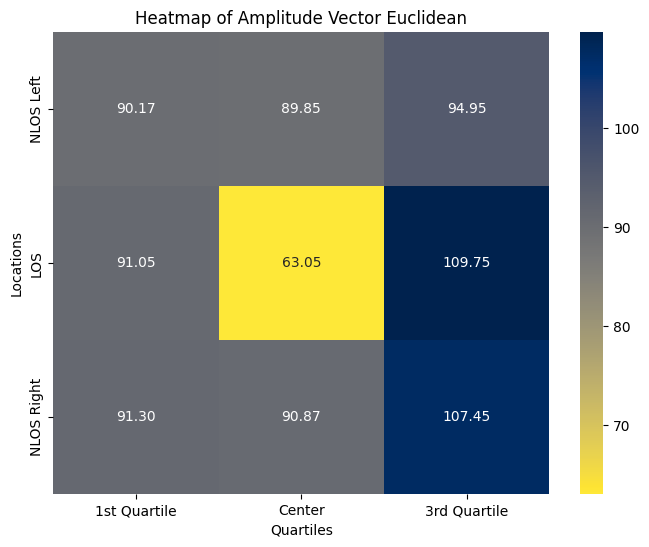

In [28]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_LOSFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_LOSFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_LOSFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_LOSFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_LOSFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_LOSFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_LOSFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_LOSFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_LOSFirstQuartile4_Cleaned),
    ],
])

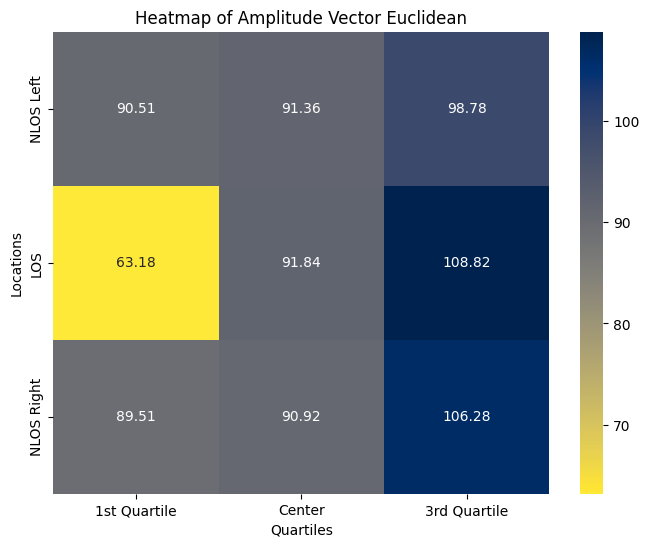

In [30]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_LOSThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_LOSThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_LOSThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_LOSThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_LOSThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_LOSThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_LOSThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_LOSThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_LOSThirdQuartile4_Cleaned),
    ],
])

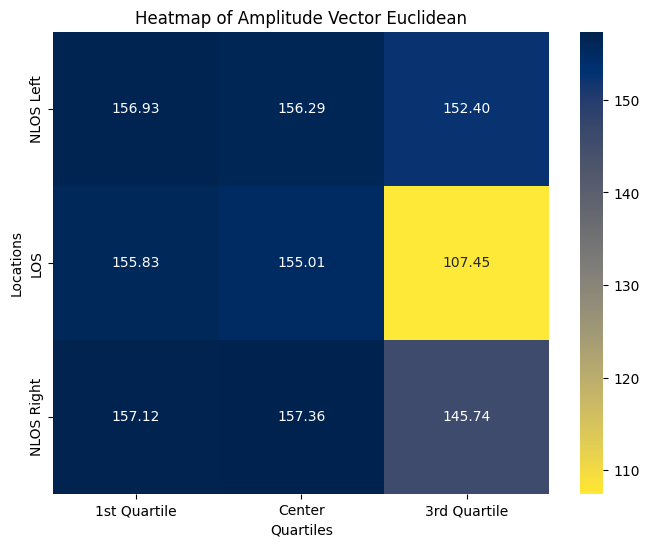

In [32]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSLeftCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSLeftCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSLeftCenter4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSLeftCenter4_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSLeftCenter4_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSLeftCenter4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSLeftCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSLeftCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSLeftCenter4_Cleaned),
    ],
])

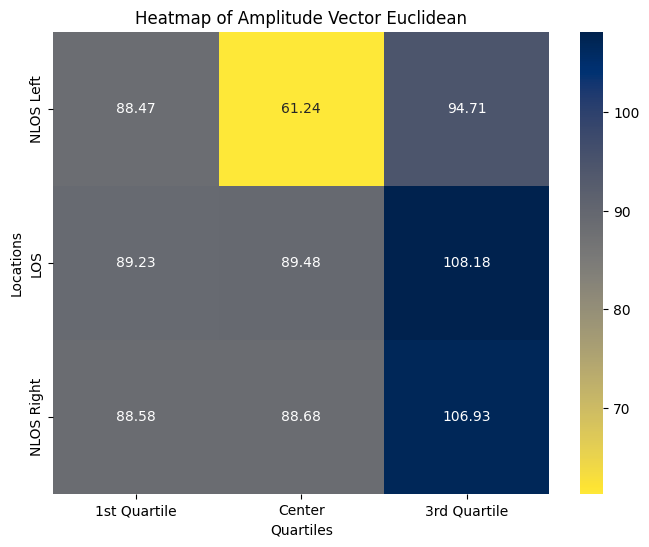

In [34]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSLeftFirstQuartile4_Cleaned),
    ],
])

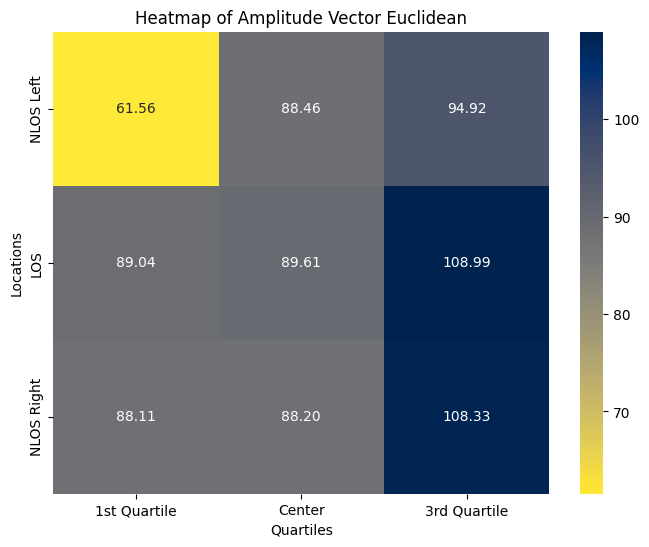

In [36]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSLeftThirdQuartile4_Cleaned),
    ],
])

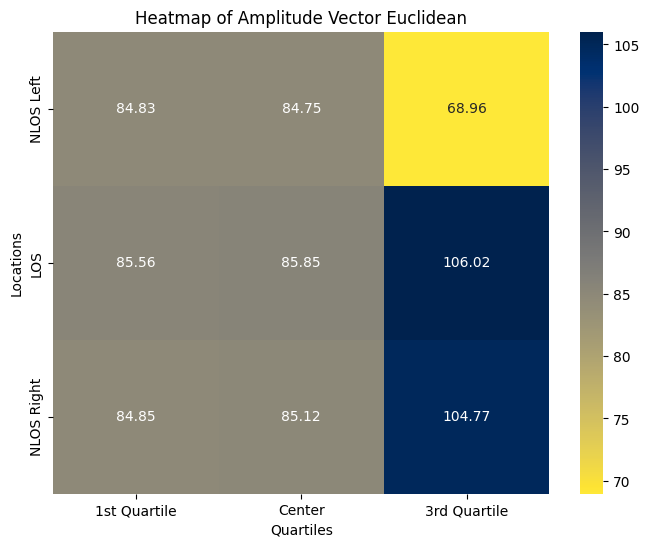

In [38]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_NLOSRightCenter2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSRightCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSRightCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSRightCenter4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSRightCenter4_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSRightCenter4_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSRightCenter4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSRightCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSRightCenter4_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSRightCenter4_Cleaned),
    ],
])

In [ ]:
Amplitude_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSRightFirstQuartile4_Cleaned),
    ],
])

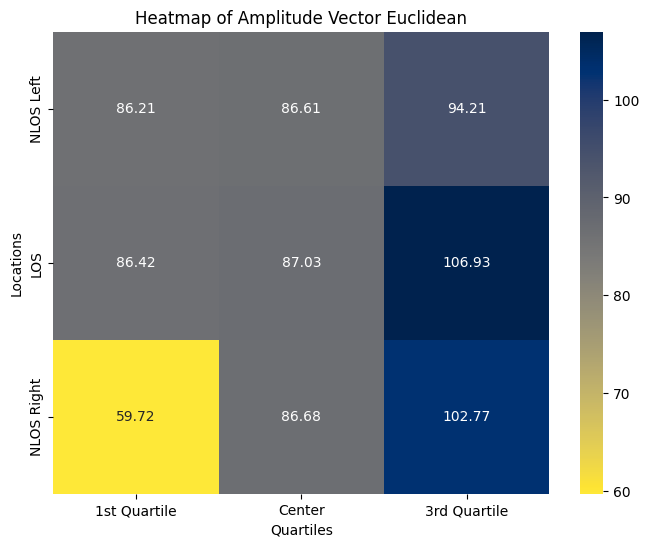

In [41]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Amplitude_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array = np.array([
    [
        distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, amplitude_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSCenter_Mean_Array, amplitude_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, amplitude_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, amplitude_NLOSRightThirdQuartile4_Cleaned),
    ],
])

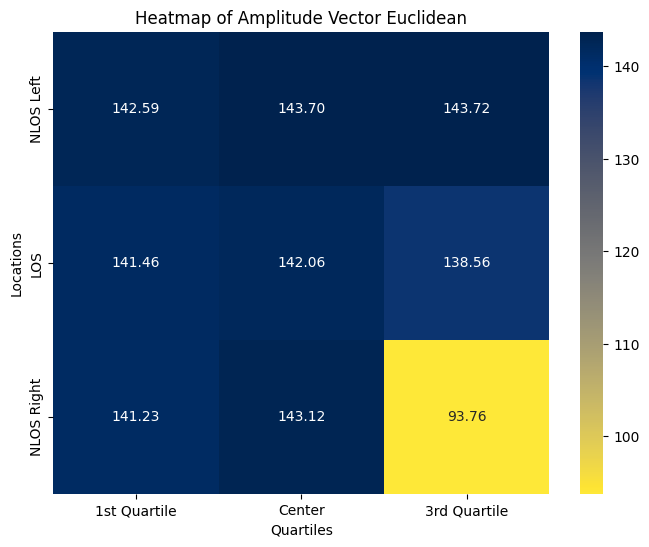

In [43]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Amplitude_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Amplitude Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

#### Heat Map Smooth for Amplitude Vector Cleaned Mean Array for 1, 2, 4(2)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial.distance as distance
from scipy.interpolate import griddata

def plot_HeatMapVectorSmooth(data_array):
    # Compute Euclidean distances for 3x3 grid
    Result_Array = np.array([
        [
            distance.euclidean(amplitude_NLOSLeftFirstQuartile_Mean_Array, data_array),
            distance.euclidean(amplitude_NLOSLeftCenter_Mean_Array, data_array),
            distance.euclidean(amplitude_NLOSLeftThirdQuartile_Mean_Array, data_array),
        ],
        [
            distance.euclidean(amplitude_LOSFirstQuartile_Mean_Array, data_array),
            distance.euclidean(amplitude_LOSCenter_Mean_Array, data_array),
            distance.euclidean(amplitude_LOSThirdQuartile_Mean_Array, data_array),
        ],
        [
            distance.euclidean(amplitude_NLOSRightFirstQuartile_Mean_Array, data_array),
            distance.euclidean(amplitude_NLOSRightCenter_Mean_Array, data_array),
            distance.euclidean(amplitude_NLOSRightThirdQuartile_Mean_Array, data_array),
        ],
    ])

    # Define 3x3 grid positions
    x = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])
    y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

    # Flatten Result_Array to match positions
    values = Result_Array.flatten()

    # Generate fine grid for interpolation
    grid_x, grid_y = np.mgrid[0:2:100j, 0:2:100j]  # Smooth interpolation

    # Interpolate data
    grid_values = griddata((x, y), values, (grid_x, grid_y), method='linear')

    # Create heatmap
    plt.figure(figsize=(6, 6))
    plt.imshow(grid_values.T, extent=(0, 2, 0, 2), origin='lower', cmap="cividis_r")
    # plt.imshow(values)
    plt.colorbar(label="Euclidean Distance")
    plt.title("Heatmap of Amplitude Vector Euclidean Distances")
    plt.xlabel("Quartiles")
    plt.ylabel("Locations")
    plt.show()


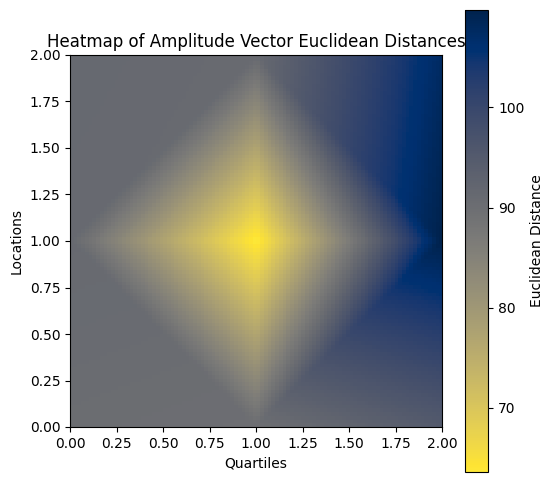

In [46]:
plot_HeatMapVectorSmooth(amplitude_LOSCenter2_Cleaned)

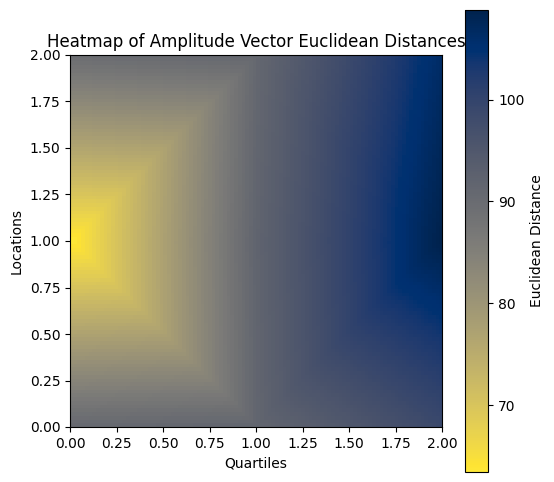

In [44]:
plot_HeatMapVectorSmooth(amplitude_LOSFirstQuartile2_Cleaned)

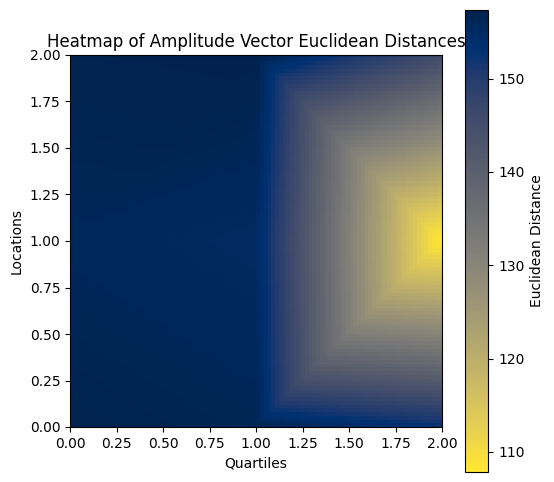

In [45]:
plot_HeatMapVectorSmooth(amplitude_LOSThirdQuartile2_Cleaned)

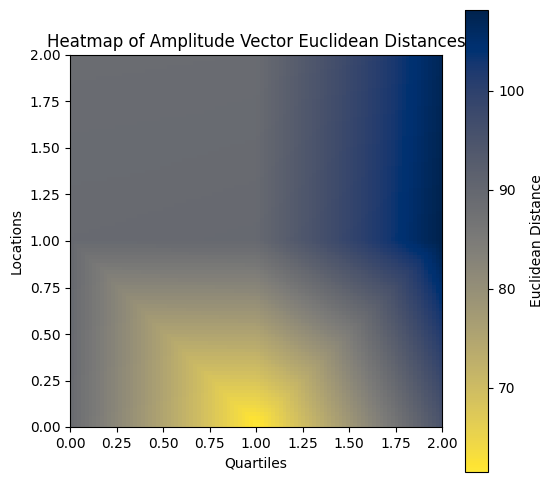

In [47]:
plot_HeatMapVectorSmooth(amplitude_NLOSLeftCenter2_Cleaned)